In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset

df = pd.read_csv('braznikova2_prep.csv', sep=';')
df.head(10)

,Y,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14
0,0,0,0,659,0,1092.0,13884.0,0,0,0,1
1,0,0,1,1518,1,348.0,11700.0,0,0,1,1
2,0,0,0,476,2,504.0,6786.0,0,0,1,1
3,0,0,0,1310,3,418.0,12948.0,0,0,1,1
4,0,1,2,2029,4,108.0,11427.0,0,0,0,0
5,0,1,3,3585,5,120.0,11856.0,0,1,0,0
6,1,0,4,4621,6,6.0,14508.0,0,0,0,0
7,1,0,5,8150,7,292.0,11310.0,0,0,0,0
8,0,0,0,1624,8,290.0,12324.0,0,0,0,0
9,0,1,6,3790,9,660.0,13455.0,0,0,0,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)

In [4]:
X = df[:, [0, 1, 2, 3, 7, 10 ]]

In [5]:
#! pip install SimpSOM


In [6]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(12, 5, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


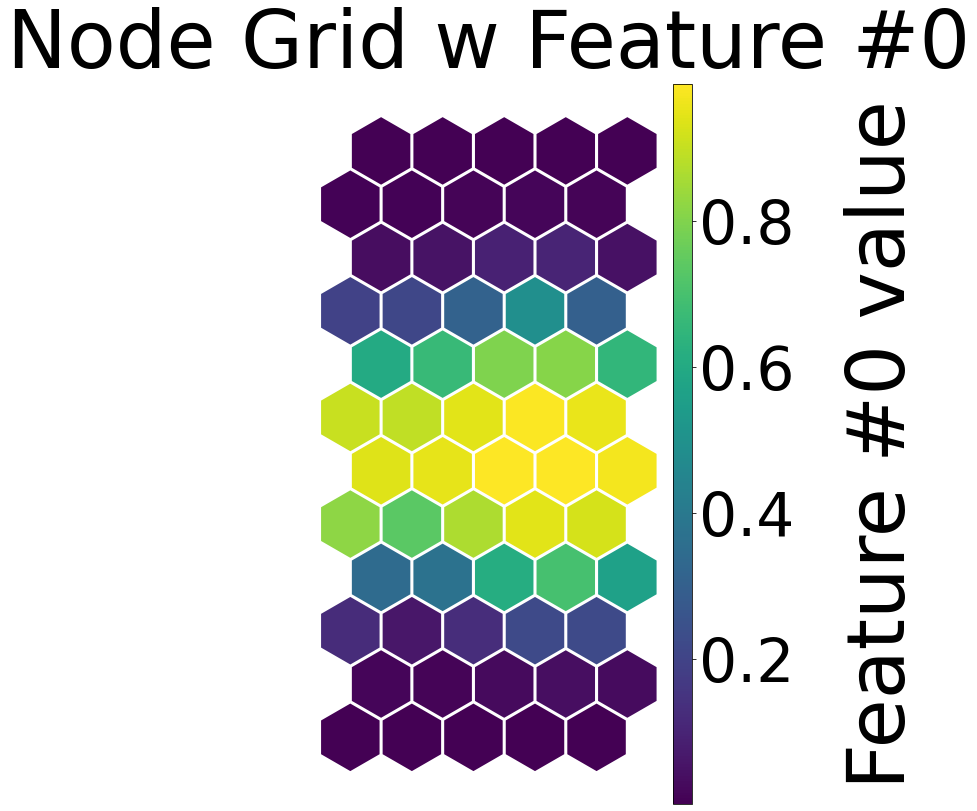

In [7]:
net.nodes_graph(colnum=0)

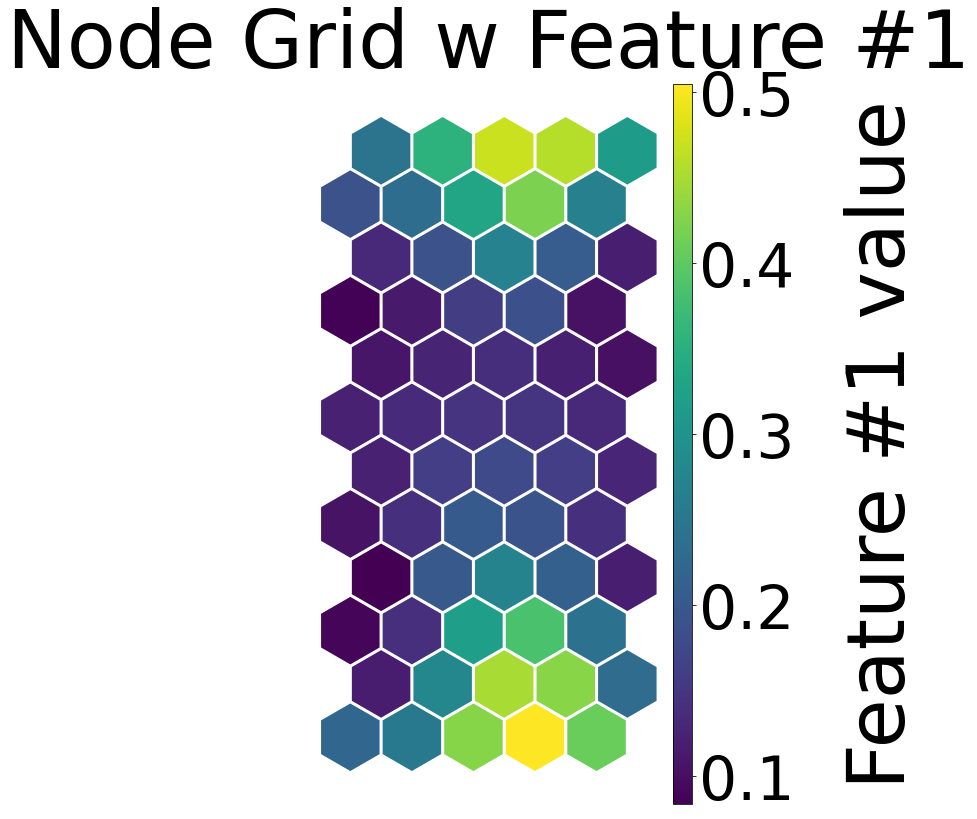

In [8]:
net.nodes_graph(colnum=1)

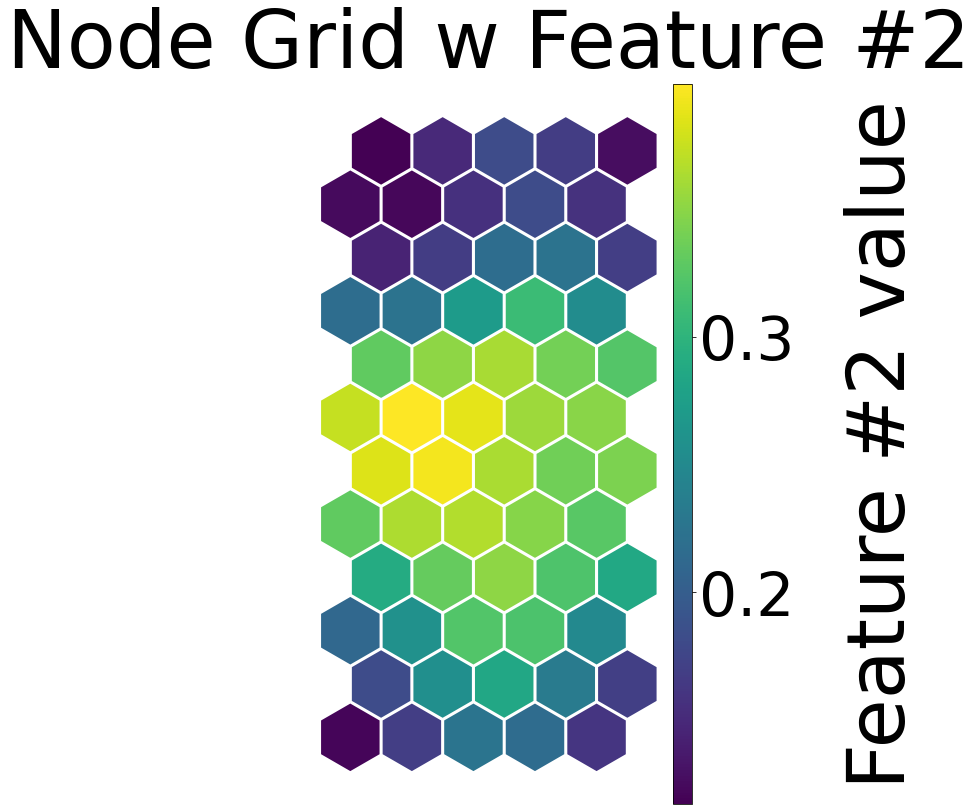

In [9]:
net.nodes_graph(colnum=2)

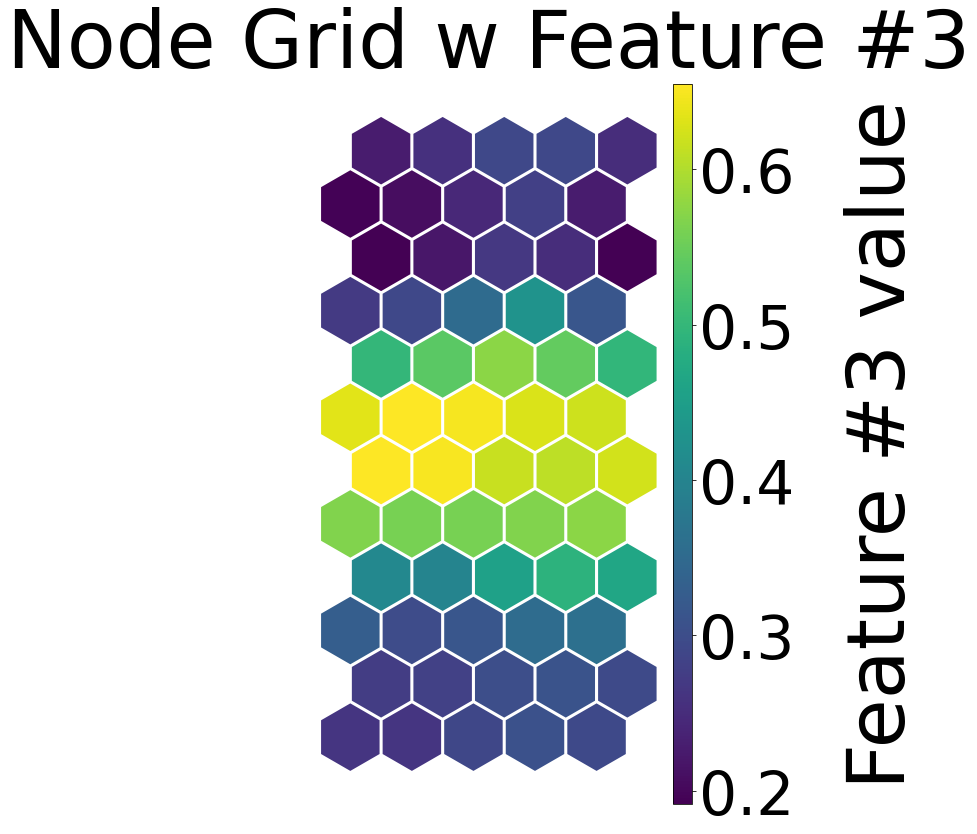

In [10]:
net.nodes_graph(colnum=3)

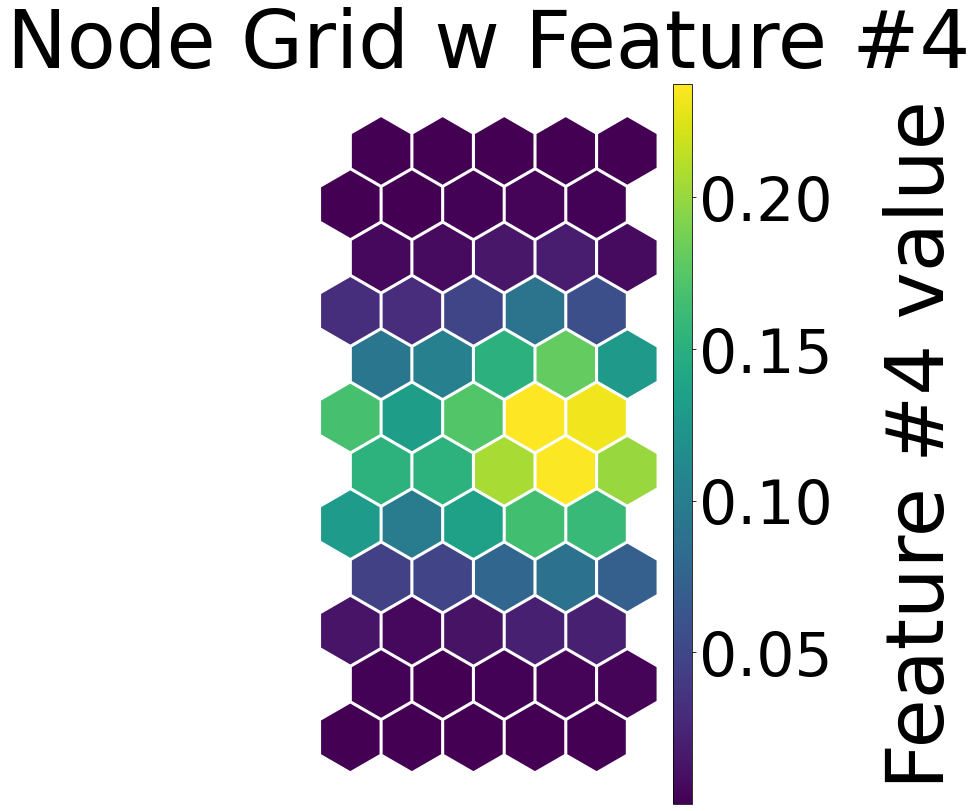

In [11]:
net.nodes_graph(colnum=4)

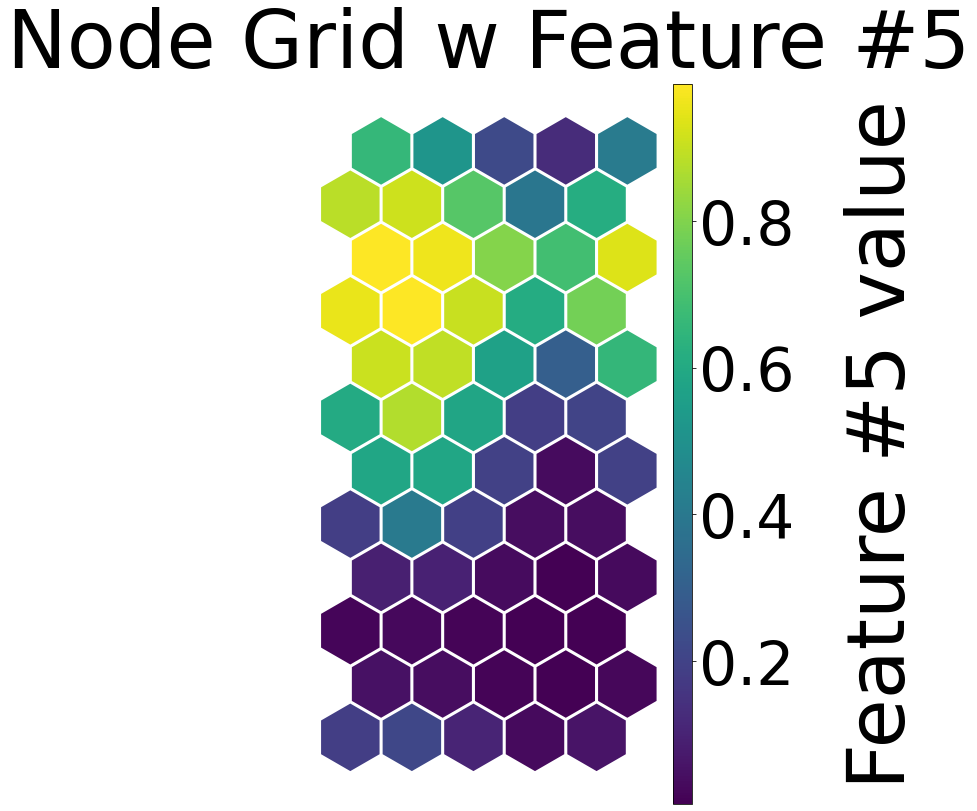

In [12]:
net.nodes_graph(colnum=5)

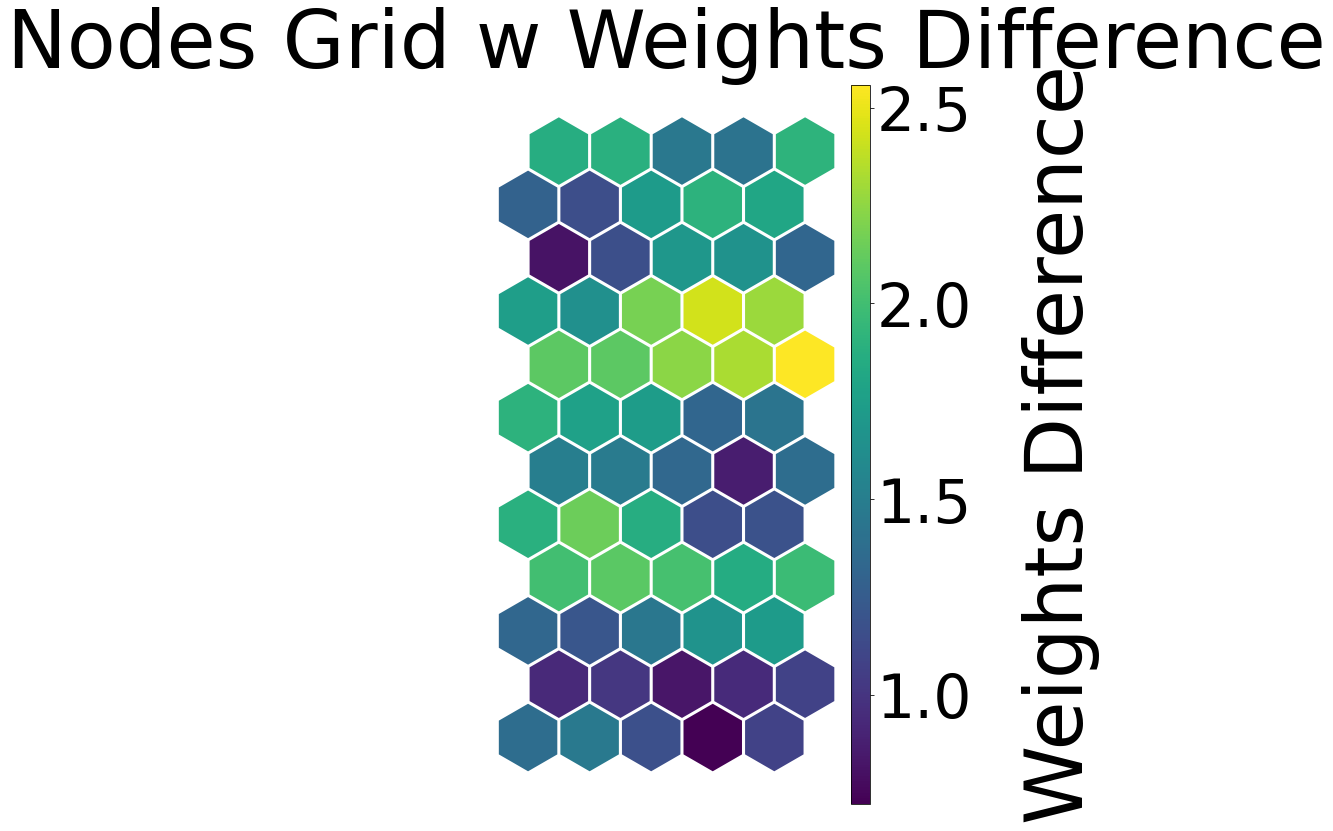

In [13]:
net.diff_graph()

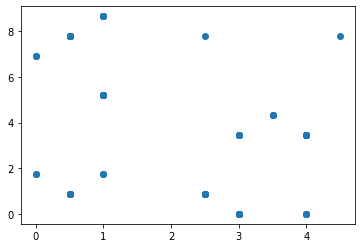

In [14]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Получен набор карт по каждому фактору, сложно выявить четку структуру и определить точное количество кластеров.

In [15]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [41]:
# Importing hc clusters
import pickle
input = open('clust-hc_znach.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc_znach = obj["hc_znach"]

In [42]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_znach,kmeans.labels_)

0.7399564605402251

In [43]:
# Importing km clusters
import pickle
input = open('clust-km_znach1.pkl', 'rb')
obj = pickle.load(input)
input.close()
km_znach1 = obj["km_znach1"]

In [44]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km_znach1,kmeans.labels_)

0.38931790810814276

Разные методы моделей имеют различное качество пересечения. Однако, в конечном итоге оставим модель разбиения на 2 кластера.

In [45]:
# Fitting K-Means to the dataset
km_znach = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms_znach = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms_znach.cluster_centers_, columns = ['Y','X3','X5','X6','X10','X14']).round(2)

,Y,X3,X5,X6,X10,X14
0,-0.0,0.27,0.21,0.25,0.00,0.39
1,1.0,0.14,0.37,0.63,0.16,0.32


Результаты:
1 кластер - неуспешные магазины: Скорей всего типо МАФ (Малая архитектурная форма - небольшое сооружение), более низкий рейтинг в Гугле, низкое количество чеков, точно не магазин мобильной связи (или его нет поблизости) и вероятнее, что рядом будет остановка.
2- успешные магазины: Явно типа МАФ, рейтинг в гугле выше, количество чеков значительно больше, скорей не магазин мобильной связи и меньше вероятность на наличие остановки городского транспорта.